<a href="https://colab.research.google.com/github/FozilovDiyorbek/Qilingan-loyihalar/blob/main/Aviakompaniya_mijozlarini_qoniqishini_bashorat_qilish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Libraries

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

In [111]:
df = pd.read_csv('/content/train_dataset.csv')
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Female,Loyal Customer,54,Personal Travel,Eco,1068,1,4,1,...,4,4,1,4,4,4,3,21,12.0,0
9996,9997,Female,Loyal Customer,54,Business travel,Eco Plus,1399,4,1,1,...,4,4,4,4,1,4,4,34,21.0,0
9997,9998,Male,Loyal Customer,46,Business travel,Business,1440,3,3,2,...,4,4,4,4,3,4,3,37,38.0,1
9998,9999,Female,Loyal Customer,41,Business travel,Business,90,4,1,4,...,3,4,5,5,5,4,5,64,210.0,1


In [108]:
test_data = pd.read_csv('/content/test_dataset.csv')
test_data

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Male,Loyal Customer,26,Business travel,Business,2949,3,3,4,...,4,4,1,4,2,3,1,4,29,36.0
3996,3997,Female,Loyal Customer,23,Personal Travel,Eco,268,1,3,0,...,2,2,3,2,4,2,3,2,0,0.0
3997,3998,Male,Loyal Customer,38,Business travel,Eco,602,2,1,1,...,2,2,1,1,2,2,3,2,23,45.0
3998,3999,Male,Loyal Customer,23,Business travel,Eco,978,5,2,2,...,4,5,1,5,1,1,3,5,0,0.0


In [109]:
solution_data = pd.read_csv('/content/sample_submission.csv')
solution_data

,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
3995,3996,0
3996,3997,0
3997,3998,0
3998,3999,0


In [69]:
### df.dropna(inplace=True)

# Create Pipeline

In [112]:
num_columns = df.drop(['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], axis=1)

In [113]:
list(num_columns)

['id',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [114]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

In [115]:
num_attribs = list(num_columns)
cat_attribs = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

full_pipeline = ColumnTransformer([
    ('nmu', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
    ])

# Data Preparetion

In [116]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=45)

In [117]:
x_train = train_set.drop('satisfaction', axis=1)
y_train = train_set['satisfaction']

x_test = test_set.drop('satisfaction', axis=1)
y_test = test_set['satisfaction']

In [118]:
x_prepared =full_pipeline.fit_transform(x_train)
x_prepared

array([[-0.12388553,  0.98114523, -0.81309745, ...,  0.        ,
         1.        ,  0.        ],
       [-0.90339721, -1.56660913, -1.12167977, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40167073, -1.56660913, -1.10312576, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.34977248,  1.65160691, -0.17737881, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5386821 , -0.49387045,  1.29131679, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.7313976 , -0.96319362, -0.97813039, ...,  1.        ,
         0.        ,  0.        ]])

In [119]:
x_test_prepared = full_pipeline.transform(x_test)

# Create model and check it

Decision Tree

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       998
           1       0.92      0.92      0.92      1002

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Model accuracy: 0.9205


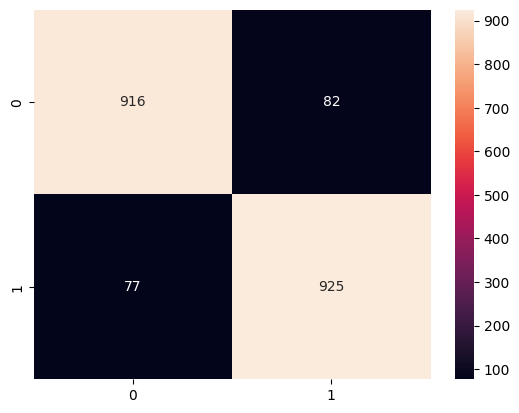

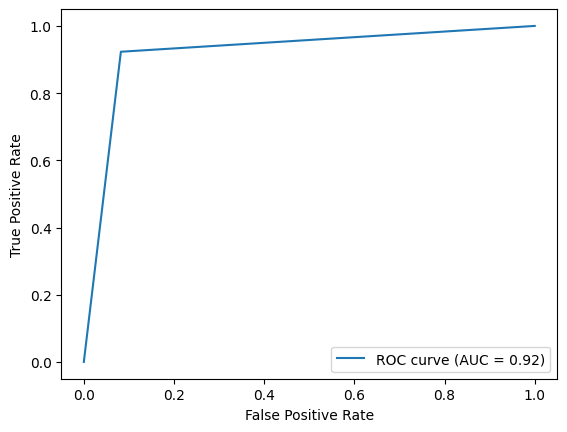

In [120]:
tree_model = DecisionTreeClassifier()
tree_model.fit(x_prepared, y_train)

# Let's evaluate the model
y_predict = tree_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model accuracy:", metrics.accuracy_score(y_test,y_predict))

###CONFUCION MATRIX
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Random Forest model

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       998
           1       0.95      0.93      0.94      1002

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.942


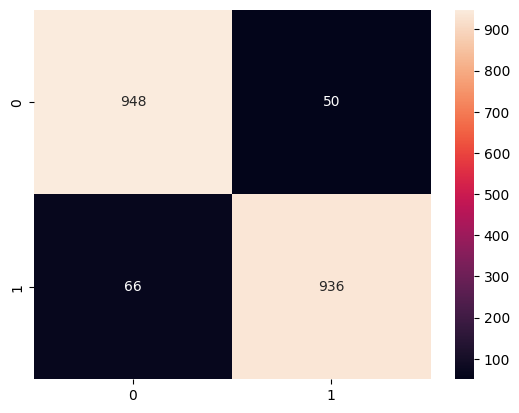

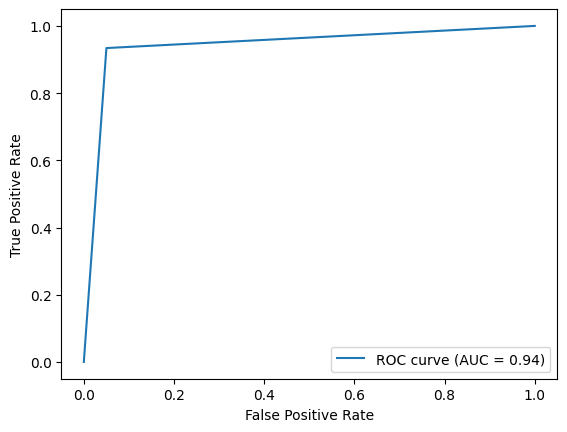

In [121]:
RF_model = RandomForestClassifier()
RF_model.fit(x_prepared, y_train)

# Let's evaluate the model
y_predict = RF_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

###CONFUCION MATRIX
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Support Vektor

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       998
           1       0.94      0.92      0.93      1002

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.9305


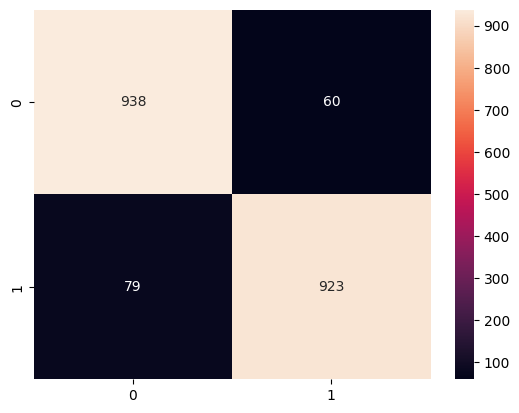

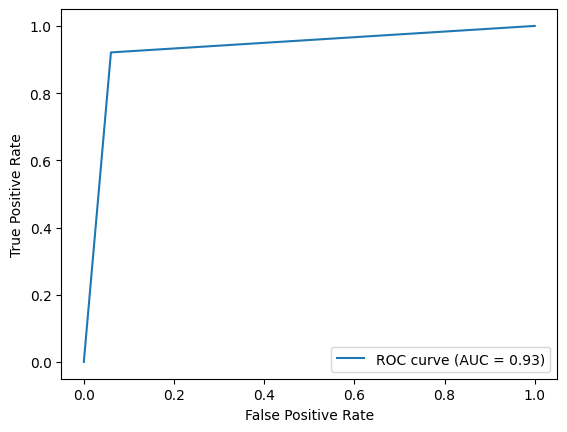

In [122]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_prepared, y_train)

# Let's evaluate the model
y_predict = svm_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

###CONFUCION MATRIX
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       998
           1       0.86      0.84      0.85      1002

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000

Model aniqligi: 0.8545


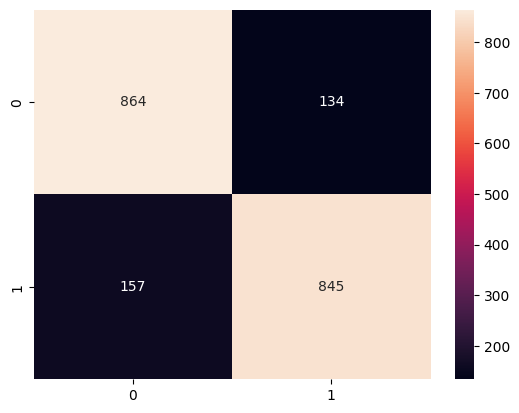

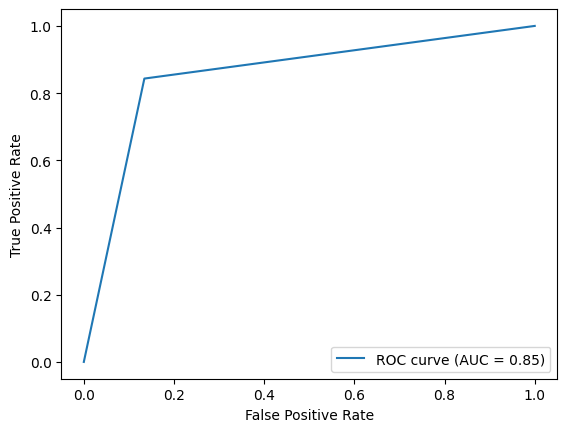

In [123]:
LR_model = LogisticRegression()
LR_model.fit(x_prepared, y_train)

# Let's evaluate the model
y_predict = LR_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBCClassifier

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       998
           1       0.96      0.93      0.94      1002

    accuracy                           0.94      2000
   macro avg       0.95      0.95      0.94      2000
weighted avg       0.95      0.94      0.94      2000

Model aniqligi: 0.945


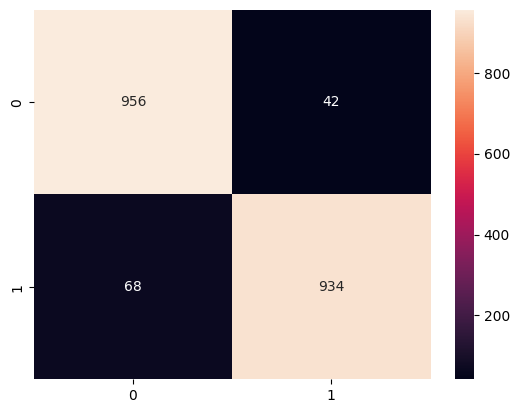

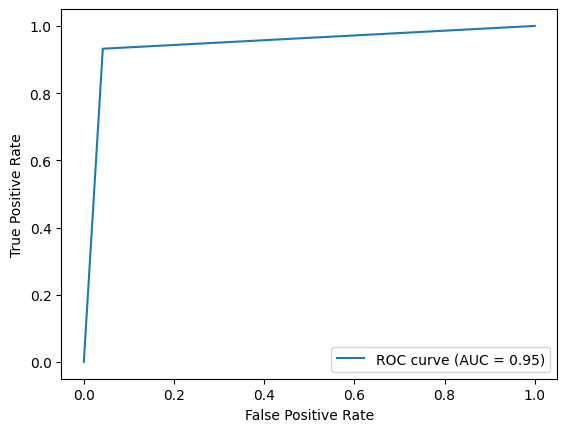

In [124]:
xgb_model = XGBClassifier()
xgb_model.fit(x_prepared, y_train)

# Let's evaluate the model
y_predict = xgb_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

KNN

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

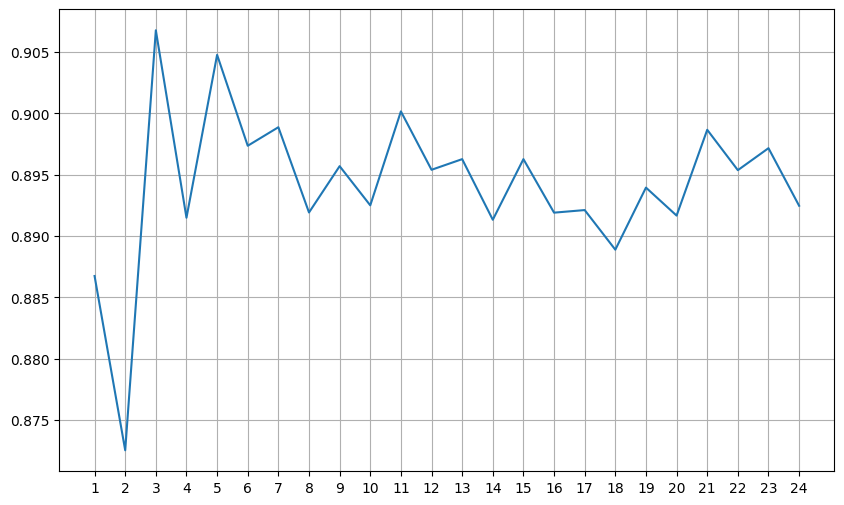

In [126]:
### CHOOSING THE BEST VALUE OF K
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) ## Value of K
    knn.fit(x_prepared, y_train)
    y_predict = knn.predict(x_test_prepared)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [127]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(x_prepared, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [128]:
knn_gscv.cv_results_['rank_test_score']

array([23, 24,  5, 21,  2, 17,  1, 15,  3, 18,  4, 11,  7, 14,  6, 20,  9,
       16, 10, 13,  8, 18, 12, 22], dtype=int32)

In [129]:
knn_gscv.best_params_

{'n_neighbors': 7}

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       998
           1       0.93      0.88      0.91      1002

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

Model aniqligi: 0.909


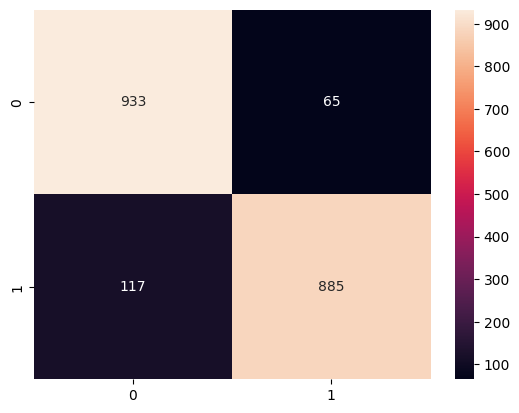

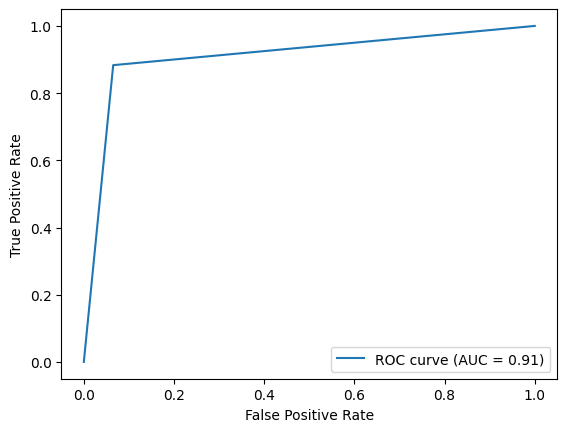

In [130]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_prepared, y_train)

# Let's evaluate the model
y_predict = knn.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

The Best model **XGBCClassifier**

In [131]:
test_data_prepared = full_pipeline.transform(test_data)

In [133]:
test_predict = xgb_model.predict(test_data_prepared)

In [136]:
solution_data['satisfaction'] = test_predict

In [138]:
solution_data.to_csv('solution_new.csv', index=False)